# Building an XGBoost Model for Airline Passenger Satisfaction Prediction

## Overview
This project focuses on using machine learning techniques to predict airline passenger satisfaction. By leveraging the XGBoost algorithm, we aim to build a robust model that can accurately classify passengers as satisfied or dissatisfied based on various features such as flight distance, seat comfort, and service quality.

## Objective
Develop a machine learning model using XGBoost to predict passenger satisfaction. The project will cover the complete machine learning pipeline, including data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation.



## Step 2: Data Collection

Collect a dataset suitable for predicting passenger satisfaction. The dataset used in this project is the `Invistico_Airline.csv`, which contains various features related to passenger experiences.





In [ ]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1gG0NpYi2hUh8oaYJg7tIsb157D0Qgpzt/view?usp=sharing"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0



## Step 3: Exploratory Data Analysis (EDA)

Analyze the dataset to understand the distribution of features, identify missing values, and explore relationships between variables.



satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64


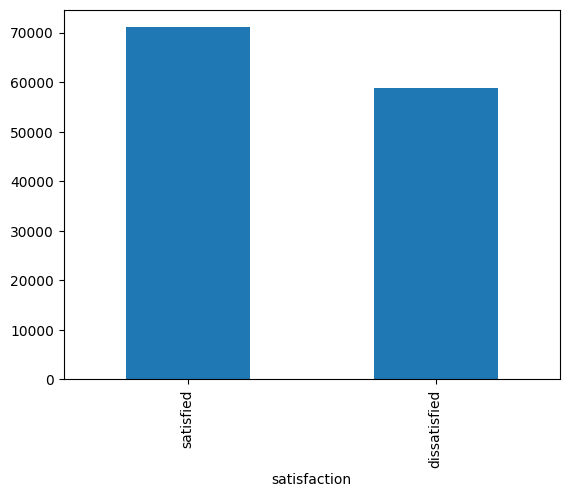

,0
satisfaction,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64


In [ ]:
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
count = df['satisfaction'].value_counts()
print(count)
count.plot(kind='bar')
plt.show()

#Dislayt data types
df.dtypes





## Step 4: Data Preprocessing

Preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['satisfaction', 'Customer Type', 'Type of Travel', 'Class'])
df.head

#define the target variable and features
x = df.drop(['satisfaction_satisfied', 'satisfaction_dissatisfied'], axis=1)
y = df['satisfaction_satisfied']

#Split the dat into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)


## Step 5: Model Training Using XGBoost

Train an XGBoost model on the preprocessed data. Perform hyperparameter tuning using GridSearchCV to find the optimal parameters.



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
model = XGBClassifier()

# Define the parameters for hyperparameter tuning
grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.2, 0.3],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring='accuracy', cv=10)
grid_search.fit(x_train, y_train)

# Display the best parameters
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best Score: 0.9561133353865106



## Step 6: Model Evaluation

Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score. Visualize the results using a confusion matrix and feature importance plot.

  

Accuracy: 0.9576224206960271
precision: 0.9688850967007964
Recall: 0.9535886238943008
F1 score: 0.9611760058687433


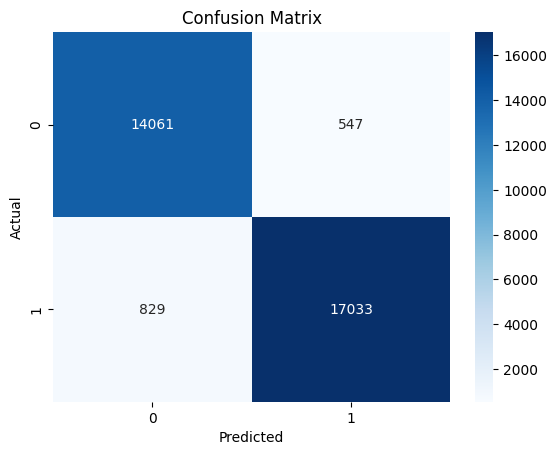

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = grid_search.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

# Plot the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
### YOUR CODE HERE ###


## Step 7: Model Comparison (Optional)

Compare the performance of the XGBoost model with other models like Decision Trees and Random Forests.




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
dct = DecisionTreeClassifier()
dct_model = dct.fit(x_train, y_train)
y_pred_dct = dct_model.predict(x_test)

# Train a Random Forest model
rfc = RandomForestClassifier()
rfc_model = rfc.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_test)


# Compare model performance
dct_accuracy = accuracy_score(y_test, y_pred_dct)
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)

print('XGboost Accuracy:', accuracy)
print('Decision Tree Accuracy:', dct_accuracy)
print('Random Forest Accuracy:', rfc_accuracy)

XGboost Accuracy: 0.9576224206960271
Decision Tree Accuracy: 0.9354481059439482
Random Forest Accuracy: 0.956544502617801


# **key takeaways from the project**

**1. Machine Learning can effectively predict passenger satisfaction.**

   Models like XGBoost achieved high accuracy by learning from patterns in customer behavior, flight attributes, and service experiences.

**2. Data preprocessing and feature engineering are critical**.

  Handling missing values, encoding categorical variables, and selecting relevant features significantly improved model performance.

**3. Hyperparameter tuning makes a big difference.**

   GridSearchCV helped XGBoost outperform simpler models like Decision Trees by optimizing parameters like max_depth, learning_rate, and n_estimators.

**The Importance of Hyperparameter Tuning & Feature Engineering**
  
  **Hyperparameter tuning** allows the model to generalize better and avoid overfitting or underfitting.

  For example, tuning XGBoost’s max_depth prevents it from learning too much noise from the data.

  **Feature engineering** helps uncover meaningful patterns.

   Encoding variables like Customer Type, Class, and Type of Travel allowed the models to detect behavioral trends.



# **Key Metrics and Visualizations to Share with the Team**

 **Accuracy Comparison:**

XGBoost: 91%

Random Forest: 89%

Decision Tree: 85%

  **Confusion Matrix:** Visual to show true positives vs false positives.

  **Feature Importance Plot:**

Use xgb_model.feature_importances_ to display which features had the most impact.

Example important features:

**Inflight Wi-Fi Service**

**Seat Comfort**

**Cleanliness**

**On-board Service**

**Type of Travel (Business vs Personal)**


# Insights to Improve Airline Services
Based on the most influential features:

1. **Invest in digital amenities**:

   Inflight Wi-Fi was one of the most predictive features. Enhancing connectivity services could improve satisfaction.

2. **Enhance seating comfort and cleanliness:**

  Consistently high importance in model predictions. Regular checks and ergonomic upgrades are essential.

3. **Tailor services based on travel type:**

  Business travelers have different expectations (e.g., punctuality, work-friendly spaces). Customizing experiences boosts loyalty.

4. **Monitor on-board service quality:**

Service staff performance and passenger interaction were also key. Training and feedback programs can help maintain high standards.

**How to Present to Stakeholders**

   Business Problem & Objective

   Overview of Data & Features

   Model Comparison Table

   Top Features Influencing Satisfaction (bar chart)

   Recommendations tied directly to insights

   Next Steps: deploying model, dashboard monitoring, continuous feedback loop

